<a href="https://colab.research.google.com/github/RichardFreedman/CRIM-Project-RF/blob/master/CRIM_intervals_Collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Search with Options

- Piece or Corpus
- Actual or Incremental Durations
- Chromatic or Diatonic
- Exact or Close
- Classify

***


In [2]:
!pip install crim-intervals
from crim_intervals import *
import pandas as pd
import ast
import matplotlib
from itertools import tee, combinations
import numpy as np
from fractions import Fraction



     |████████████████████████████████| 18.5MB 222kB/s 
     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 61kB 4.6MB/s 
     |████████████████████████████████| 61kB 6.2MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
  Created wheel for music21: filename=music21-5.7.2-cp37-none-any.whl size=22024603 sha256=1066800013bcf787f0501baefbd67f731044f083fe2ade12caf276c3f43b9e92
  Stored in directory: /root/.cache/pip/wheels/6e/d0/05/1ef3daa9ae295073d807e468fcd820641965086424f1c633e3
Successfully built music21
ERROR: google-colab 1.0.0 has requirement requests~=2.23.0, but you'll have requests 2.25.1 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: music21 5.5.0
    Uninstalling music21-5.5.0:
      Successfully uninstalled music21-5.5.0
  Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Succe

### Short Corpus

In [3]:
# work_list = ['CRIM_Mass_0002_1.mei',
#  'CRIM_Mass_0002_2.mei',
#  'CRIM_Mass_0002_3.mei',
#  'CRIM_Mass_0002_4.mei',
#  'CRIM_Mass_0002_5.mei',
# 'CRIM_Model_0001.mei']
# Herissant_Missa_Quandiu_1.mei_msg.mei
# Herissant_Missa_Quandiu_2.mei_msg.mei
# Herissant_Missa_Quandiu_3.mei_msg.mei
# Herissant_Missa_Quandiu_4.mei_msg.mei
# Herissant_Missa_Quandiu_5.mei_msg.mei
# Sermisy_Tant.mei_msg.mei
# Riquet_Missa_Susanne_1.mei_msg.mei
# Riquet_Missa_Susanne_2.mei_msg.mei
# Riquet_Missa_Susanne_3.mei_msg.mei
# Riquet_Missa_Susanne_4.mei_msg.mei
# Riquet_Missa_Susanne_5.mei_msg.mei


git = 'https://raw.githubusercontent.com/RichardFreedman/CRIM_additional_works/main/'
work_list = [git + 'Riquet_Missa_Susanne_1.mei_msg.mei']
# work_list = ['CRIM_Model_0001.mei']


# work_list

corpus = CorpusBase(work_list)
for s in corpus.scores:
    print(s.metadata.title)

Requesting file from https://raw.githubusercontent.com/RichardFreedman/CRIM_additional_works/main/Riquet_Missa_Susanne_1.mei_msg.mei...
Successfully imported.
Missa Susanne un jour Kyrie


## Load File and Correct the MEI Metadata from CRIM

In [ ]:
# work_list = ['CRIM_Mass_0002_1.mei',
#  'CRIM_Mass_0002_2.mei',
#  'CRIM_Mass_0002_3.mei',
#  'CRIM_Mass_0002_4.mei',
#  'CRIM_Mass_0002_5.mei',
# 'CRIM_Model_0001.mei']

work_list = ['CRIM_Model_0019.mei']


In [ ]:
work_list = [el.replace("CRIM_", "https://crimproject.org/mei/MEI_4.0/CRIM_") for el in work_list]
corpus = CorpusBase(work_list)

import xml.etree.ElementTree as ET
import requests

MEINSURI = 'http://www.music-encoding.org/ns/mei'
MEINS = '{%s}' % MEINSURI

for i, path in enumerate(work_list):
    
    try:
        if path[0] == '/':
            mei_doc = ET.parse(path)
        else:
            mei_doc = ET.fromstring(requests.get(path).text)

      # Find the title from the MEI file and update the Music21 Score metadata
        title = mei_doc.find('mei:meiHead//mei:titleStmt/mei:title', namespaces={"mei": MEINSURI}).text
        print(path, title)
        corpus.scores[i].metadata.title = title
    except:
        continue

for s in corpus.scores:
    print(s.metadata.title)

Requesting file from https://crimproject.org/mei/MEI_4.0/CRIM_Model_0019.mei...
Successfully imported.
https://crimproject.org/mei/MEI_4.0/CRIM_Model_0019.mei Veni sponsa Christi
Veni sponsa Christi



## Select Actual or Incremental Durations

#### About Rhythmic Durations

- For `find_close_matches` and `find_exact_matches`, rhythmic variation/duration is displayed, but **not** factored into the calculation of matching.
- **Incremental Offset** calculates the intervals using a **fixed offset between notes**, no matter their actual duration.  Use this to ignore passing tones or other ornaments.  The offsets are expressed in multiples of the quarter note (Offset = 1 samples at quarter note; Offset = 2 at half note, etc). Set with `vectors = IntervalBase(corpus.note_list_incremental_offset(2))`

In [4]:
vectors = IntervalBase(corpus.note_list)
#vectors = IntervalBase(corpus.note_list_incremental_offset(2))

***

## Select Generic or Semitone Scale:

- **Length of the Soggetto**: `into_patterns([vectors.semitone_intervals], 5)` 

- The **number** in this command represents the **minimum number of vectors to find**. 5 vectors is 6 notes.


In [5]:
patterns = into_patterns([vectors.generic_intervals], 4)
#patterns = into_patterns([vectors.semitone_intervals], 4)

***

## Select Exact Matches Here, or Close Below
#### (Use comment feature to select screen preview or CSV output) 

- **Exact** is exact in *all* ways `find_exact_matches(patterns, 2)` 
- The **number** in this command represents the **minimum number of matching melodies needed before reporting**. This allows us to filter for common or uncommon soggetti.

In [7]:
exact_matches = find_exact_matches(patterns, 2)
output_exact = export_pandas(exact_matches)
output_exact["pattern_generating_match"] = output_exact["pattern_generating_match"].apply(tuple)

pd.DataFrame(output_exact).head()
pd.set_option("display.max_rows", None, "display.max_columns", None)
output_exact.head()
# output_exact.to_csv(f"{s.metadata.title}_exact.csv")

Finding exact matches...
29 melodic intervals had more than 2 exact matches.



,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,end_measure,end_beat,start_offset,end_offset,note_durations,ema,ema_url
0,"(1, 1, 2, -2)","[1, 1, 2, -2]",Missa Susanne un jour Kyrie,[Superius],5,1.0,7,3.0,32.0,52.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","5-7/1/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url
1,"(1, 1, 2, -2)","[1, 1, 2, -2]",Missa Susanne un jour Kyrie,[Altus],21,1.0,23,3.0,160.0,180.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","21-23/2/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url
2,"(1, 1, 2, -2)","[1, 1, 2, -2]",Missa Susanne un jour Kyrie,[Tenor],38,1.0,40,3.0,296.0,316.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","38-40/3/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url
3,"(1, 2, -2, -2)","[1, 2, -2, -2]",Missa Susanne un jour Kyrie,[Superius],6,1.0,8,1.0,40.0,56.0,"[4.0, 4.0, 4.0, 4.0, 8.0]","6-8/1/@1.0-end,@start-end,@start-1.0",File must be a crim url to have a valid EMA url
4,"(1, 2, -2, -2)","[1, 2, -2, -2]",Missa Susanne un jour Kyrie,[Altus],22,1.0,24,1.0,168.0,184.0,"[4.0, 4.0, 4.0, 4.0, 8.0]","22-24/2/@1.0-end,@start-end,@start-1.0",File must be a crim url to have a valid EMA url


In [8]:
df = output_exact
pd.set_option("display.max_rows", None, "display.max_columns", None)
df["note_durations"] = df["note_durations"].map(lambda x: pd.eval(x))
df["start_offset"] = df["start_offset"].map(lambda x: pd.eval(x))
df["end_offset"] = df["end_offset"].map(lambda x: pd.eval(x))
df["pattern_generating_match"] = df["pattern_generating_match"].apply(tuple)
df["pattern_matched"] = df["pattern_matched"].apply(tuple)
df["sum_durs"] = df.note_durations.apply(sum)
df = df.round(2)

# df.to_csv(f"{s.metadata.title}_exact.csv")


***

### Select Close Matches Here
#### (Comment out the 'for item iteration' in order to skip screen preview)

- **Close** matches allow for melodic variation (see more below). `find_close_matches(patterns, 2, 1)`
- The **first number** in this command is the **minimum number of melodies** needed before reporting
- The **second number** is **threshold of similarity** needed in order to find a match. 
- Lower number = very similar; higher number = less similar

##### More about Close Matches  
- The **threshold for close matches** is determined by the **second number** called in the method. 
- We select two patterns, then compare *each vector in each pattern successively*. 
- The *differences between each vector are summed*. 
- If that value is **below the threshold specified**, we consider the **two patterns closely matched**.
- The format of the method call is  `find_close_matches(the array you get from into_patterns, minimum matches needed to be displayed, threshold for close match)`.

In [ ]:
close_matches = find_close_matches(patterns, 2, 1)
#for item in close_matches:
   #item.print_close_matches()
    #return pd.DataFrame(close_matches)

output_close = export_pandas(close_matches)
output_close["pattern_generating_match"] = output_close["pattern_generating_match"].apply(tuple)
# output_close.to_csv(f"{s.metadata.title}_close.csv")


Finding close matches...
86 melodic intervals had more than 2 exact or close matches.



In [11]:
df = output_exact
pd.set_option("display.max_rows", None, "display.max_columns", None)
df["note_durations"] = df["note_durations"].map(lambda x: pd.eval(x))
df["start_offset"] = df["start_offset"].map(lambda x: pd.eval(x))
df["end_offset"] = df["end_offset"].map(lambda x: pd.eval(x))
df["pattern_generating_match"] = df["pattern_generating_match"].apply(tuple)
df["pattern_matched"] = df["pattern_matched"].apply(tuple)
df["sum_durs"] = df.note_durations.apply(sum)
df = df.round(2)
df.head()
# df.to_csv(f"{s.metadata.title}_close.csv")


,pattern_generating_match,pattern_matched,piece_title,part,start_measure,start_beat,end_measure,end_beat,start_offset,end_offset,note_durations,ema,ema_url,sum_durs
0,"(1, 1, 2, -2)","(1, 1, 2, -2)",Missa Susanne un jour Kyrie,[Superius],5,1.0,7,3.0,32.0,52.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","5-7/1/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url,24.0
1,"(1, 1, 2, -2)","(1, 1, 2, -2)",Missa Susanne un jour Kyrie,[Altus],21,1.0,23,3.0,160.0,180.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","21-23/2/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url,24.0
2,"(1, 1, 2, -2)","(1, 1, 2, -2)",Missa Susanne un jour Kyrie,[Tenor],38,1.0,40,3.0,296.0,316.0,"[8.0, 4.0, 4.0, 4.0, 4.0]","38-40/3/@1.0-end,@start-end,@start-3.0",File must be a crim url to have a valid EMA url,24.0
3,"(1, 2, -2, -2)","(1, 2, -2, -2)",Missa Susanne un jour Kyrie,[Superius],6,1.0,8,1.0,40.0,56.0,"[4.0, 4.0, 4.0, 4.0, 8.0]","6-8/1/@1.0-end,@start-end,@start-1.0",File must be a crim url to have a valid EMA url,24.0
4,"(1, 2, -2, -2)","(1, 2, -2, -2)",Missa Susanne un jour Kyrie,[Altus],22,1.0,24,1.0,168.0,184.0,"[4.0, 4.0, 4.0, 4.0, 8.0]","22-24/2/@1.0-end,@start-end,@start-1.0",File must be a crim url to have a valid EMA url,24.0


***

## Classify Patterns Here 
*  Note:  depends on choice of Close or Exact above!  


In [12]:
# THIS IS DEV COPY for use with CLOSE/EXACT Matches

import numpy as np

# Converts lists to tuples

def lists_to_tuples(el):
    if isinstance(el, list):
        return tuple(el)
    else:
        return el

# Filters for the length of the Presentation Type in the Classifier

def limit_offset_size(array, limit):
    under_limit = np.cumsum(array) <= limit
    return array[: sum(under_limit)]

# Gets the the list of offset differences for each group 

def get_offset_difference_list(group):
    # if we do sort values as part of the func call, then we don't need this first line
    group = group.sort_values("start_offset")
    group["next_offset"] = group.start_offset.shift(-1)
    offset_difference_list = (group.next_offset - group.start_offset).dropna().tolist()
    return offset_difference_list

# The classifications are done here
# be sure to have the offset difference limit set here and matched in gap check below  80 = ten bars

def classify_offsets(offset_difference_list):
    """
    Put logic for classifying an offset list here
    """
    # 
    offset_difference_list = limit_offset_size(offset_difference_list, 500)
    
    alt_list = offset_difference_list[::2]
    
    if len(set(offset_difference_list)) == 1 and len(offset_difference_list) > 1:
        return ("PEN", offset_difference_list)
    # elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1):
    elif (len(offset_difference_list) %2 != 0) and (len(set(alt_list)) == 1) and (len(offset_difference_list) >= 3):
        return ("ID", offset_difference_list)
    elif len(offset_difference_list) >= 1:
        return ("Fuga", offset_difference_list)
    else: 
        return ("Singleton", offset_difference_list)
    
# adds predicted type, offsets and entry numbers to the results

def predict_type(group):
    offset_differences = get_offset_difference_list(group)
    predicted_type, offsets = classify_offsets(offset_differences)

    group["predicted_type"] = [predicted_type for i in range(len(group))]
    group["offset_diffs"] = [offsets for i in range(len(group))]
    group["entry_number"] = [i + 1 for i in range(len(group))]

    return group

In [13]:
# lists for views.  These are used when calling the df below

simple_view = ["piece_title", "part", "pattern_generating_match", "pattern_matched", "start_offset"]

offset_details = ["start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

drop_cols = ["pattern_matched", "part", "pattern_generating_match", "piece_title", "start_measure", "start_beat", "end_offset", "note_durations", "prev_entry_off", "next_entry_off"]

ready_classify = ["pattern_generating_match", "pattern_matched", "piece_title", "part", "start_measure", "start_beat", "start_offset", "sub_group_id", "is_first"]

In [14]:
# now process the original match data df by:
# sorting by start offset, then group by pattern generating match and applying the function above for prev entry
# also give each group a number
# sort by group number and start offset
# so that we can find PARALLEL (=0) Forward Gaps (the distance to NEXT entry), and Backward Gaps (distance to PREVIOUS Entry)
# All Proximate Matches are part of same sub Group (and go to classifier)
# Parallels are part of Sub Group but NOT part of Classified.  We will filter them OUT before classification
# Forward ONLY means the NEXT entry is a GAP.  No problem for Forward ONLY, since these are part of the previous set.
# Backward ONLY means the LAST entry was a GAP.  So these are NEW subgroups, since a new Presentation Type begins
# Forward AND Backward Gaps are SINGLETONS:  We will filter then OUT before Classification
# If an entry is the LAST in a Group and also has a BACKWARD gap it is also a SINGLETON

df2 = df

# Make Groups, Sort By Group and Offset, then and Add Previous/Next
df2["group_number"] = df2.groupby('pattern_generating_match').ngroup()
# df2["group_number"] = df2.groupby('pattern_matched').ngroup()
df2 = df2.sort_values(['group_number', 'start_offset'])
df2["prev_entry_off"] = df2["start_offset"].shift(1)
df2["next_entry_off"] = df2["start_offset"].shift(-1)


first_of_group = df2.drop_duplicates(subset=["pattern_generating_match"], keep='first').index
df2["is_first"] = df2.index.isin(first_of_group)
last_of_group = df2.drop_duplicates(subset=["pattern_generating_match"], keep='last').index
df2["is_last"] = df2.index.isin(last_of_group)

# Check Differences between Next and Last Offset

df2["last_off_diff"] = df2["start_offset"] - df2["prev_entry_off"]
df2["next_off_diff"] = df2["next_entry_off"] - df2["start_offset"]

# Find Parallel Entries 
df2["parallel"] = df2["last_off_diff"] == 0

# Set Gap Limits and Check Gaps Forward and Back
df2["forward_gapped"] = df2["next_off_diff"] >= 40
df2["back_gapped"] = df2["last_off_diff"] >= 40

# Find Singletons and Split Groups with Gaps
df2["singleton"] = ((df2['forward_gapped'] == True) & (df2['back_gapped'] == True) | (df2['back_gapped'] == True) & (df2["is_last"]))
df2["split_group"] = (df2['forward_gapped'] == False) & (df2['back_gapped'] == True)

#Mask Out Parallels and Singletons
df2 = df2[df2["parallel"] != True]
df2 = df2[df2["singleton"] != True]
df2["next_off_diff"] = df2["next_off_diff"].abs()
df2["last_off_diff"] = df2["last_off_diff"].abs()

# Find Final Groups
df2["combined_group"] = (df2.split_group | df2.is_first)
df2.loc[(df2["combined_group"]), "sub_group_id"] = range(df2.combined_group.sum())
df2["sub_group_id"] = df2["sub_group_id"].ffill()



## Histogram of Sum of Durations for Each Soggetto

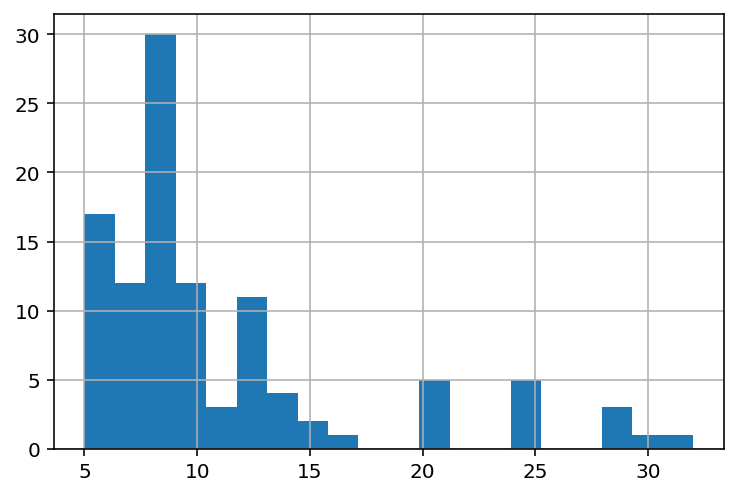

In [15]:
df2.sum_durs.hist(bins = 20)

In [16]:
# mask out short or long soggetti depending on information above

df2 = df2[df2["sum_durs"] >= 10]
df2 = df2[df2["sum_durs"] <= 25]


In [17]:
# run the classifier on the newly curated list of groups

classified2 = df2.applymap(lists_to_tuples).groupby("sub_group_id").apply(predict_type)

# OPTIONAL:  drop the new singletons

classified2.drop(classified2[classified2['predicted_type'] == "Singleton"].index, inplace = True)

# OPTIONAL:  select only certain presentation types

# classified2 = classified2[classified2["predicted_type"] == "Fuga"]

classified2["start"] = classified2["start_measure"].astype(str) +"/"+ classified2["start_beat"].astype(str) 
classified2.drop(columns=['start_measure', 'start_beat','offset_diffs'], inplace=True)

# put things back in order by offset and group them again
classified2.sort_values(by = ["start_offset"], inplace=True)
# c3 = classified2.groupby(by = ["sub_group_id"])
# c3 = c3.head()
# Now transform as Pivot Table
pivot = classified2.pivot_table(index=["piece_title", "pattern_generating_match", "predicted_type", "sub_group_id"],
            columns="entry_number",
            values=["part", "start_offset", "start", "sum_durs"],
            aggfunc=lambda x: x)
pivot_sort = pivot.sort_values(by = [("start_offset", 1)])
pivot_sort = pivot_sort.fillna("-")
pivot_sort.reset_index(inplace=True)
pivot_sort = pivot_sort.drop(columns=['start_offset', 'sub_group_id'], level=0)
pivot_sort


piece_title pattern_generating_match  \
entry_number                                                         
0             Missa Susanne un jour Kyrie          (3, -2, -2, -2)   
1             Missa Susanne un jour Kyrie            (2, 2, -2, 2)   
2             Missa Susanne un jour Kyrie         (-2, -2, -2, -2)   
3             Missa Susanne un jour Kyrie           (4, 1, -2, -3)   
4             Missa Susanne un jour Kyrie           (1, -2, -3, 2)   
5             Missa Susanne un jour Kyrie           (1, 1, -2, -2)   
6             Missa Susanne un jour Kyrie          (-2, -2, -2, 2)   
7             Missa Susanne un jour Kyrie          (-2, -2, 2, -2)   
8             Missa Susanne un jour Kyrie            (2, 2, 2, -2)   

             predicted_type         part                          start  \
entry_number                           1            2         3       1   
0                      Fuga      [Altus]     [Bassus]         -   1/1.0   
1                      Fuga     [Bassus]      [Tenor]         -   7/3.0   
2                      Fuga  [Superius]      [Bassus]         -  11/3.0   
3                      Fuga     [Bassus]  [Superius]   [Bassus]  17/1.0   
4                      Fuga     [Bassus]  [Superius]   [Bassus]  17/3.0   
5                      Fuga      [Altus]      [Tenor]  [Bassus]  26/1.0   
6                      Fuga      [Tenor]      [Tenor]         -  30/2.0   
7                      Fuga      [Tenor]      [Tenor]         -  30/4.0   
8                      Fuga  [Superius]       [Altus]         -  39/2.0   

                             sum_durs            
entry_number       2       3        1     2   3  
0              3/1.0       -     10.0  10.0   -  
1              7/4.5       -     12.0  13.0   -  
2             13/3.0       -     20.0  10.0   -  
3             18/2.0  19/4.0     12.0  10.0  11  
4             18/3.0  20/1.0     12.0  10.0  10  
5             26/4.0  28/2.0     24.0  14.0  12  
6             31/4.0       -     14.0  10.0   -  
7             32/1.0       -     12.0  16.0   -  
8             43/1.5       -     12.0  11.0   -

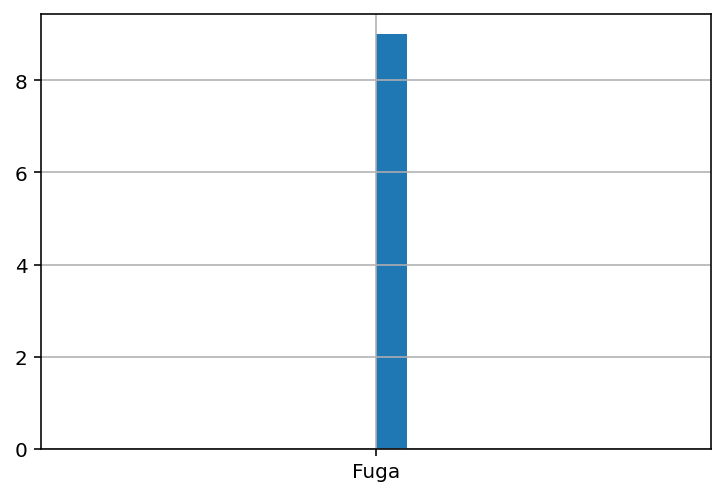

In [18]:

pivot_sort.predicted_type.hist(bins = 20)
# pivot_c3.shape

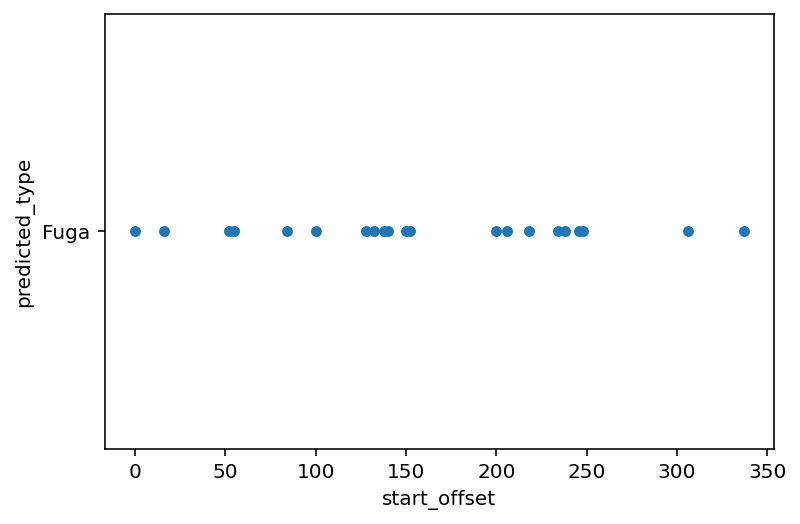

In [19]:
classified2.plot.scatter(y="predicted_type", x="start_offset")

In [ ]:

# Final output as CSV
pivot_sort

pivot_sort.to_csv("Herissant_Agnus_Classified_close.csv")



# Durational Ratios

#### This Function Calculates the Ratios of the Durations in each Match

In [ ]:
# makes pairs of ratio strings

def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def get_ratios(input_list):
    ratio_pairs = []
    for a, b in pairwise(input_list):
        ratio_pairs.append(b / a)
    return ratio_pairs

def lists_to_tuples(el):
    if isinstance(el, list):
        return tuple(el)
    else:
        return el


#### Now call the function to operate on the RESULTS file from earlier

In [ ]:
type(df.note_durations)

In [ ]:
# calculates 'duration ratios' for each soggetto, then adds this to the DF
df2 = results.applymap(lists_to_tuples)
# df2["note_durations"].astype(str)
df2["duration_ratios"] = df2.note_durations.apply(get_ratios)

df_s = df2.drop(columns=["ema_url", "ema"])
df_s.head(20)

In [ ]:
df_s = df[["piece_title", "pattern_generating_match", "part", "start_measure", "start_offset"]]
df_s.head(20)

## Group by the Pattern Generating Match
- Each has its own string of durations, and duration ratios
- and then we compare the ratios to get the differences
- the "list(combinations)" method takes care of building the pairs, using data from our dataframe 'results'

In [ ]:
def compare_ratios(ratios_1, ratios_2):
    
    ## division of lists 
    # using zip() + list comprehension 
    diffs = [i - j for i, j in zip(ratios_1, ratios_2)] 
    abs_diffs = [abs(ele) for ele in diffs] 
    sum_diffs = sum(abs_diffs)

    return sum_diffs

#results["Pattern_Generating_Match"] = results["Pattern_Generating_Match"].apply(tuple) 

def get_ratio_distances(df_s, pattern_col, output_cols):
    
    matches = []

    for name, group in df_s.groupby(pattern_col):

        ratio_pairs = list(combinations(group.index.values, 2))

        for a, b in ratio_pairs:
            
            a_match = df_s.loc[a]
            b_match = df_s.loc[b]
            
            sum_diffs = compare_ratios(a_match.duration_ratios, b_match.duration_ratios)
            
            match_dict = {
                "pattern": name,
                "sum_diffs": sum_diffs
            }
            
            for col in output_cols:
                match_dict.update({
                    f"match_1_{col}": a_match[col],
                    f"match_2_{col}": b_match[col]
                })
                
            matches.append(match_dict)
            
    return pd.DataFrame(matches)

### Now Run the Function to get the 'edit distances' for the durations of matching patterns

In [ ]:
ratio_distances = get_ratio_distances(df_s, "pattern_generating_match", ["pattern_generating_match", "piece_title", "part", "start_measure", "start_beat", "start_offset", "sum_durs", "duration_ratios"])
ratio_distances.sort_values(["match_1_start_offset", "match_2_start_offset"])

## Filters by Differences between Sum of Durations


In [ ]:
by_sum_diffs = ratio_distances[(ratio_distances.match_1_sum_durs - ratio_distances.match_2_sum_durs) <= 2]
by_sum_diffs

### And FILTER the results according to any threshold we like

In [ ]:
ratios_filtered = by_sum_diffs[by_sum_diffs.sum_diffs <= 1]
ratios_filtered

In [ ]:
ratios_filtered = ratios_filtered.sort_values("pattern")
ratios_filtered

### Now Group the Duration-Filter Results by the Pattern (which shows us very closely related soggetti in sets)

In [ ]:
new["super_match"] = ratios_filtered.groupby(["pattern", "match_1_start_measure"], inplace=True)
new
# grouped

In [ ]:
grouped.to_csv("grouped.csv")

### Greedy Soggetti
* Groups by voice part
* Gets one voice, then creates shifted cols to contain current+previous intervals and durations
* slices each tuple: removes first from previous match and last from current match
* if these are identical, then we can merge the two soggetti

In [ ]:
results["pattern_matched"] = results["pattern_matched"].apply(tuple)
# results_s = results.drop(columns=["ema_url", "ema", "duration_ratios", "pattern_generating_match"])
# # #results_s["group_number"] = group_number
# # results_grouped = results_s.groupby(by=["piece_title", "part"])
# # results_grouped.sort_values("start_measure")
# # results_grouped.head()
# results_shifted = results_s.groupby(["part"]).shift(1)
# results_shifted.head()


In [ ]:
# function to group by piece and part, then add shfted columns to accept Greedy Data
# the 'df: pd.DataFrame' here is a way of specifying the type that ought to go here
# it's a form of annotation or 'typing'

def add_shifted_cols(df: pd.DataFrame,
                    group_cols: list,
                    shift_cols: list,
                    shift_periods=-1,
                    shifted_prefix="next"
                    ) -> pd.DataFrame:
    
    
    df = df.copy()

    df_shifted = df.groupby(group_cols).shift(shift_periods)

    df[[ f"{shifted_prefix}_{c}" for c in shift_cols]] = df_shifted[shift_cols]

    return df

In [ ]:
# Sequence here helps us deal with tuples in the data, slicing as needed the various lists of vectors and durations

from typing import Sequence

def add_subsequence_cols(df: pd.DataFrame, this_sequence_cols: Sequence, next_sequence_cols: Sequence) -> pd.DataFrame:

    df = df.copy()

    for col in this_sequence_cols:
            df[f"{col}_short"] = df[col].dropna().apply(lambda x: x[1:]) 
    
    for col in next_sequence_cols:
            df[f"{col}_short"] = df[col].dropna().apply(lambda x: x[:-1])
          

    return df



In [ ]:
# here we call the function to add the cols

df_shifted = add_shifted_cols(results,
                    group_cols=["piece_title", "part"],
                    shift_cols=["start_measure", "end_measure", "note_durations", "pattern_matched"])

df_brief = df_shifted.sort_values("start_measure").drop(columns=["ema", "ema_url", "pattern_generating_match"])
df_brief

In [ ]:
# And here we call the function to slice and enter the data

df_brief = add_subsequence_cols(df_shifted, 
    this_sequence_cols=["pattern_matched", "note_durations"], 
    next_sequence_cols=["next_pattern_matched", "next_note_durations"]
    )
df_brief.drop(columns=["ema", "ema_url", "pattern_generating_match", "duration_ratios"])

In [ ]:
# Now  filter previous results to make sure the melodic and rhythmic vectors match for each sequence

df_filter_durs = df_brief[df_brief["note_durations_short"] == df_brief["next_note_durations_short"]]
df_filter_patts = df_filter_durs[df_filter_durs["pattern_matched_short"] == df_filter_durs["next_pattern_matched_short"]]
df_filter_patts.count()

In [ ]:
# This is just a way to inspect a single voice

df_filter_one_voice = df_filter_patts[df_filter_patts["part"].str.contains('Contratenor')]
df_filter_one_voice.head()

In [ ]:
# Make sure there are no NaN values 

# Add new column for check of matching end measures +1 (which we do by subtracting 1, then checking for ==)
# combine the results:  these are the soggetti that need to get Greedy

df_filter_patts['next_end_measure'].fillna(0)
df_filter_patts['next_end_measure_minus'] = df_filter_patts['next_end_measure'].apply(lambda x: x-1)
df_test_1 = df_filter_patts[df_filter_patts["end_measure"] == df_filter_patts["next_end_measure"]]
df_test_2 = df_filter_patts[df_filter_patts["end_measure"] == df_filter_patts["next_end_measure_minus"]]
df_test_combined = pd.concat([df_test_1, df_test_2])
df_test_combined
